## Neural Network
### Perceptron 과 Neural Network(신경망)

In [255]:
import numpy as np
import matplotlib.pyplot as plt

In [256]:
# step 함수
def step(x):
    return np.where(x > 0,1,0)

In [257]:
x = np.arange(-5,5,0.1)

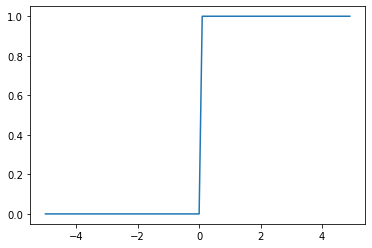

In [258]:
plt.plot(x,step(x))
plt.show()

In [259]:
# sigmoid 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

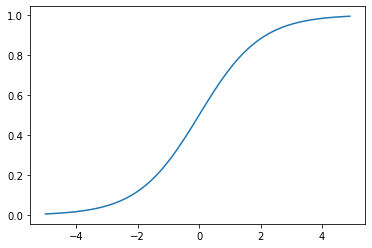

In [260]:
plt.plot(x, sigmoid(x))
plt.show()

In [261]:
# relu 함수
def relu1(x):
    return np.where(x > 0, x,0)

In [262]:
def relu2(x):
    return np.maximum(0,x)

In [263]:
x1 = np.random.randn(1000000,100)

In [264]:
%%time
np.sum(relu1(x1))

CPU times: total: 656 ms
Wall time: 679 ms


39898099.23211858

In [265]:
%%time
np.sum(relu2(x1))

CPU times: total: 1.14 s
Wall time: 1.15 s


39898099.23211858

In [266]:
def relu(x):
    return np.maximum(0,x)

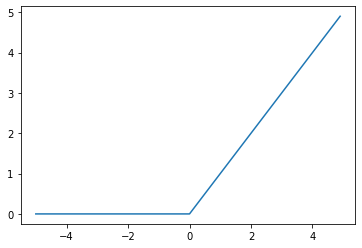

In [267]:
plt.plot(x,relu(x))
plt.show()

In [268]:
## softmax 함수
def softmax(x):
    c = np.max(x)
    x = x - c
    return np.exp(x)/np.sum(np.exp(x))

In [269]:
softmax(np.array([1000,2,3]))

array([1., 0., 0.])

In [270]:
# np.exp(1000)
# 지수가 높으면 무한대로 나옴

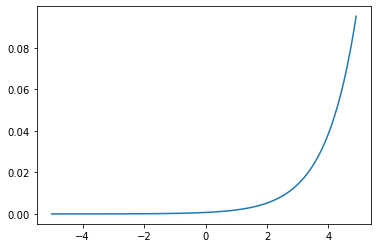

In [271]:
plt.plot(x,softmax(x))
plt.show()

In [272]:
from sklearn.datasets import load_iris

In [273]:
X = load_iris()["data"]
y = load_iris()["target"]

In [274]:
X.shape

(150, 4)

In [275]:
y.shape

(150,)

In [276]:
w1 = np.random.randn(4,128)
b1 = np.zeros(128)
w2 = np.random.randn(128,64)
b2 = np.zeros(64)
w3 = np.random.randn(64,3)
b3 = np.zeros(3)

layer1 = np.dot(X,w1) + b1
z1 = sigmoid(layer1)
layer2 = np.dot(z1,w2) + b2
z2 = relu(layer2)
layer3 = np.dot(z2,w3) + b3
output = softmax(layer3)

In [277]:
output.shape

(150, 3)

In [278]:
np.unique(y)

array([0, 1, 2])

In [279]:
def make_one(x):
    result = np.zeros((x.size, np.unique(x).size))
    for idx1,idx2 in enumerate(x):
        result[idx1,idx2] = 1
    return result

In [280]:
y = make_one(y)

In [281]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [282]:
np.argmax(output)

302

In [283]:
# for k,v in enumerate(y):
#     print(k,v)

In [284]:
###

In [285]:
def binary_entropy(y,t):
    return np.mean(t*np.log(y) + (1-t)*np.log(1-y))*-1

In [286]:
def categorical_crossentropy(y,t):
    return np.mean(-t*np.log(y))

In [287]:
categorical_crossentropy(output,y)

10.226250265877093

In [288]:
### 미분 함수
def grad(f,x):
    h = 1e-4
    x = float(x)
    fxh = f(x+h)
    fx = f(x)
    return (fxh - fx)/h

In [289]:
f = lambda x : x**2
grad(f,3)

6.000100000012054

In [290]:
### 편미분 함수

In [291]:
x = np.array([2.,1.])

In [292]:
def f(x):
    return x[0]**3 + x[1]**2

In [293]:
f(x)

9.0

In [294]:
(3*2**2, 2*1)

(12, 2)

In [295]:
def par_grad(f,x):
    grad = []
    h = 1e-4
    
    tmp = x[0]
    x[0] = tmp+h
    fxh = f(x)
    x[0] = tmp
    fx = f(x)
    grad.append((fxh - fx)/h)
    
    tmp = x[1]
    x[1] = tmp+h
    fxh = f(x)
    x[1] = tmp
    fx = f(x)
    grad.append((fxh - fx)/h)
    
    return grad

In [296]:
par_grad(f,x)

[12.000600010022566, 2.000100000003613]

In [297]:
def par_grad(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(grad.size):
        tmp = x[idx]
        x[idx] = tmp+h
        fxh = f(x)
        x[idx] = tmp
        fx = f(x)
        grad[idx] = (fxh - fx)/h
    return grad

In [298]:
par_grad(f,x)

array([12.00060001,  2.0001    ])

In [299]:
it = np.nditer(np.zeros((5,3)), flags=["multi_index"],op_flags=["readwrite"])

In [300]:
it.multi_index

(0, 0)

In [301]:
it.iternext()

True

In [302]:
it.finished

False

In [303]:
### while 함수
i=0
while i < 10:
    print(i)
    i += 1

0
1
2
3
4
5
6
7
8
9


In [304]:
x = np.arange(20).reshape(4,5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [305]:
x[it.multi_index]

1

In [306]:
it = np.nditer(x, flags=["multi_index"],op_flags=["readwrite"])

In [307]:
while not it.finished:
    idx = it.multi_index
    print(x[idx])
    it.iternext()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [308]:
### while문으로 만들기

def par_grad(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=["multi_index"],op_flags=["readwrite"])
    
    while not it.finished:
        idx = it.multi_index
        tmp = x[idx]
        x[idx] = tmp+h
        fxh = f(x)
        x[idx] = tmp
        fx = f(x)
        grad[idx] = (fxh - fx)/h
        it.iternext()
    return grad

In [309]:
x = np.array([2.,1.])

In [310]:
par_grad(f,x)

array([12.00060001,  2.0001    ])